# Exam - Phase Estimation and Shor's Algorithm

This Jupyter Notebook contains a "?" at several places. Please substitute these question marks by the correct code.

Make sure you execute each cell.

## Your coordinates

##### First Name: ...
##### Last Name: ...

## Installations (if needed)

In [ ]:
%pip install ?[visualization]

In [ ]:
%pip install qiskit-aer

## Single Qubit Phase Estimation

The phase is represented by an angle Theta.
We want to find an estimate for Theta.
Does the Phase Estimation Procedure allow us to do so?

Remember that QFT1 = (1) in other words, a Matrix of the size 1x1.


<font color = 'blue'>**Please look at the picture of the Circuit to complete the code!**</font>

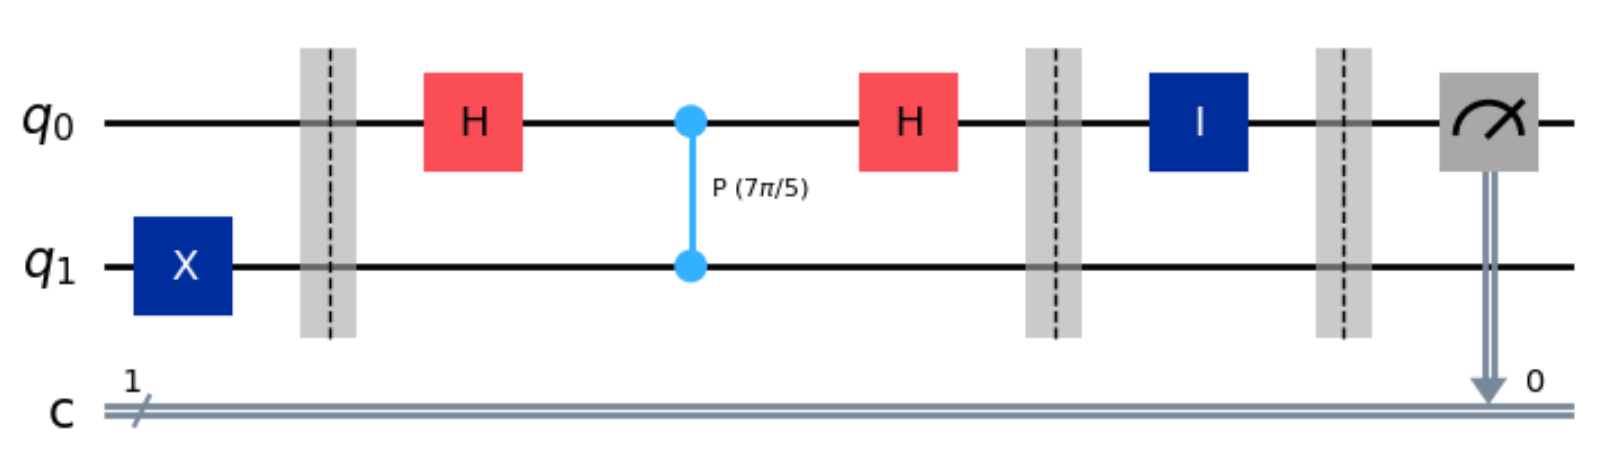

In [ ]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7  
# Theta can be changed to any value between 0 and 1
# We want to find an estimate for theta.
# Does the Phase Estimation allows us to do so? 

# 0.7 = 7/10
# This means: phase = 2*pi*theta = 7*pi/5 

qc = QuantumCircuit(?, ?)

# Prepare eigenvector |ψ>, which is the |1> state

qc.?(1)
qc.barrier()

# Implement the estimation procedure
# The Controlled U-Gate is the Controlled Phase Gate ("cp") with phase 2*pi*Theta = 7*pi/5.
qc.?(0)
qc.cp(? * ? * ?, 0, 1)
qc.?(0)
qc.barrier()

# The QFT-1 is simply the identity operator on Qubit q0
qc.id(0)
qc.barrier()

# Perform the final measurement
qc.?(0,0)

# Draw the circuit
display(qc.draw('mpl'))

In this Circuit, the Eigenvector |ψ> is |1>.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
result = AerSimulator().run(?, shots=10000).result()
statistics = ?.get_counts()
plot_histogram(?)

In [ ]:
print(statistics)

In [ ]:
print("Probability to measure 0: ", statistics['0']/?)

In [ ]:
print("Probability to measure 1: ", statistics['1']/?)

In [ ]:
We can now compare the results to the predicted values to see that they're correct.

In [ ]:
# We make use of what we calculated mathematically in the course:
# p0 = [cos(pi*theta)]**2
# p1 = [sin(pi*theta)]**2

display({   # Calculate predicted results
    0: cos(pi * ?) ** 2,
    1: ?(pi * ?) ** 2
})

## Quantum Fourier Transform for 2 Qubits

Remember that QFT2 = H, or that the 2-dimensional Quantum Fourier Transform is equivalent to the Hadamard Gate. 
We defined the QFT recursively as below, starting from the Hadamard Gate as QFT1. 

<font color = 'blue'>**Please look at the picture of the Circuit to complete the code!**</font>

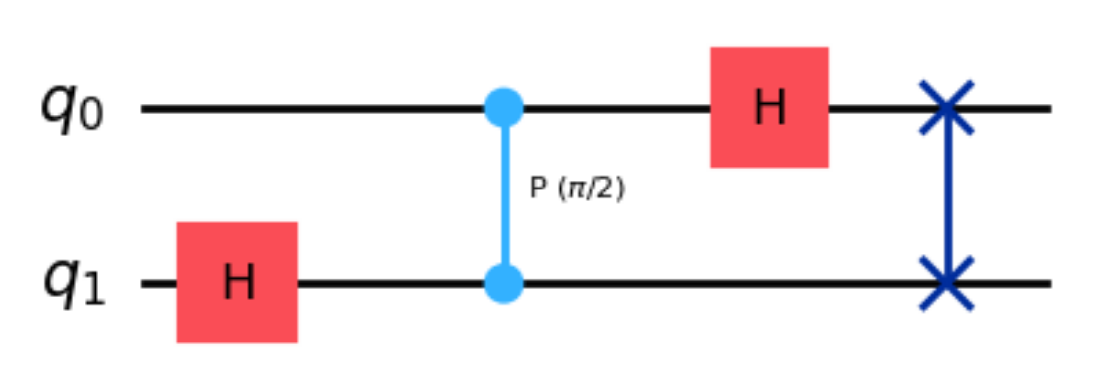

In [ ]:
qfttwo = QuantumCircuit(2)
?
?
?
?
qfttwo.draw('mpl')

You will need this small thinking exercise in the next step. 

## Two-Qubit Phase Estimation

Our eigenvector |ψ> is |1>.

We conditionally apply the eigenvalue once for qubit0.

We conditionally apply the eigenvalue twice for qubit1. 

In [ ]:
from math import pi
from qiskit import QuantumCircuit

theta = 0.7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary U gates
# Apply the U-Gate once is q0 is control Qubit.
# Apply the U-Gate twice if q1 is control Qubit.
qc.cp(? * ? * ?, 0, 2)
qc.cp(? * ? * (2 * ?), 1, 2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT2, in other words QFT-2
# Look to the previous exercise: apply the gates in the inverse sequence and the angle with a minus-sign.
?
?
?
?
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
display(qc.draw('mpl'))

Execute the Circuit

In [ ]:
result = AerSimulator().run(qc, shots=10000).result()
statistics = result.get_counts()
plot_histogram(statistics)

In [ ]:
print("Probability to get decimal 0 = binary 00, or Theta = 0/4: ", statistics['00']/?)
print("Probability to get decimal 1 = binary 01, or Theta = 1/4: ", statistics['01']/?)
print("Probability to get decimal 2 = binary 10, or Theta = 2/4: ", statistics['10']/?)
print("Probability to get decimal 3 = binary 11, or Theta = 3/4: ", statistics['11']/?)

## QFTs in Qiskit

In [ ]:
from qiskit.circuit.library import QFT
display(QFT(4).decompose().draw('mpl'))

Now, we are going to draw the built-in QFT for 8 Qubits.

In [ ]:
# Dislay the built-in QFT for 8 Qubits.
display(QFT(?).?().?('?'))

In [ ]:
Now, we are going to draw the built-in Inverse QFT for 4 Qubits.

In [ ]:
# Draw the built-in QFT4-1:
display(QFT(4, inverse=True).?().?('?'))

For the fun, we are going to draw the built-in Inverse QFT for 8 Qubits.

In [ ]:
# Draw the built-in QFT8-1:
display(QFT(?, ?=?).?().?('?'))

## Phase Estimation

Try adjusting θ and the number of control qubits m to see how the results change.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = 0.7
m = 3  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(?)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, ?)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(?, inverse=?),
    inplace=True
)

# Measure everything
qc.measure(range(?), range(?))
display(?.draw('mpl'))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from qiskit.primitives import Sampler

In [ ]:
result = Sampler().run(?).result()

In [ ]:
display(plot_histogram(?.quasi_dists))

In [ ]:
most_probable = max(result.quasi_dists[0], key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

## The Controlled Multiplication

First we'll hard code a controlled-multiplication operation for a given element 
a ∈ Z15.  

In order to Hard-Code the controlled-multiplication, think about these aspects
- We represent bits with a decimal value between 0 and 15, for which we need 0000, ..., 1111.

*For multiplication by 2:* 
- 0000 x 2 = 0000
- 0001 x 2 = 0010
- 0010 x 2 = 0100
- 0011 x 2 = 0110
- 0100 x 2 = 1000
- 0101 x 2 = 1010
- 0110 x 2 = 1100
- 0111 x 2 = 1110
- 1000 x 2 = 0001
- 1001 x 2 = 0011
- 1010 x 2 = 0101
- 1011 x 2 = 0111
- 1100 x 2 = 1001
- 1101 x 2 = 1011
- 1110 x 2 = 1101

*You can achieve this as follows with Bits 3210:* 
- Swap Bit 2 and 3
- Swap Bit 1 and 2
- Swap Bit 0 and 1

The sequence of the Swaps is important and all of them must happen.

The same reasoning applies for the other multiplications by 4, 7, 8, 11, 13.

For some of them, we need even more Swaps.

Please accept that the circuit below does the multiplication modulo 15, by applying smart Swaps.

Als, the multiplication modulo 15 is turned into a conditional Gate. 

In [ ]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

# Algorithm of Shor - Illustration of the Circuit without Execution

<font color = 'blue'>**Please look at the picture of the Circuit to complete the code!**</font>

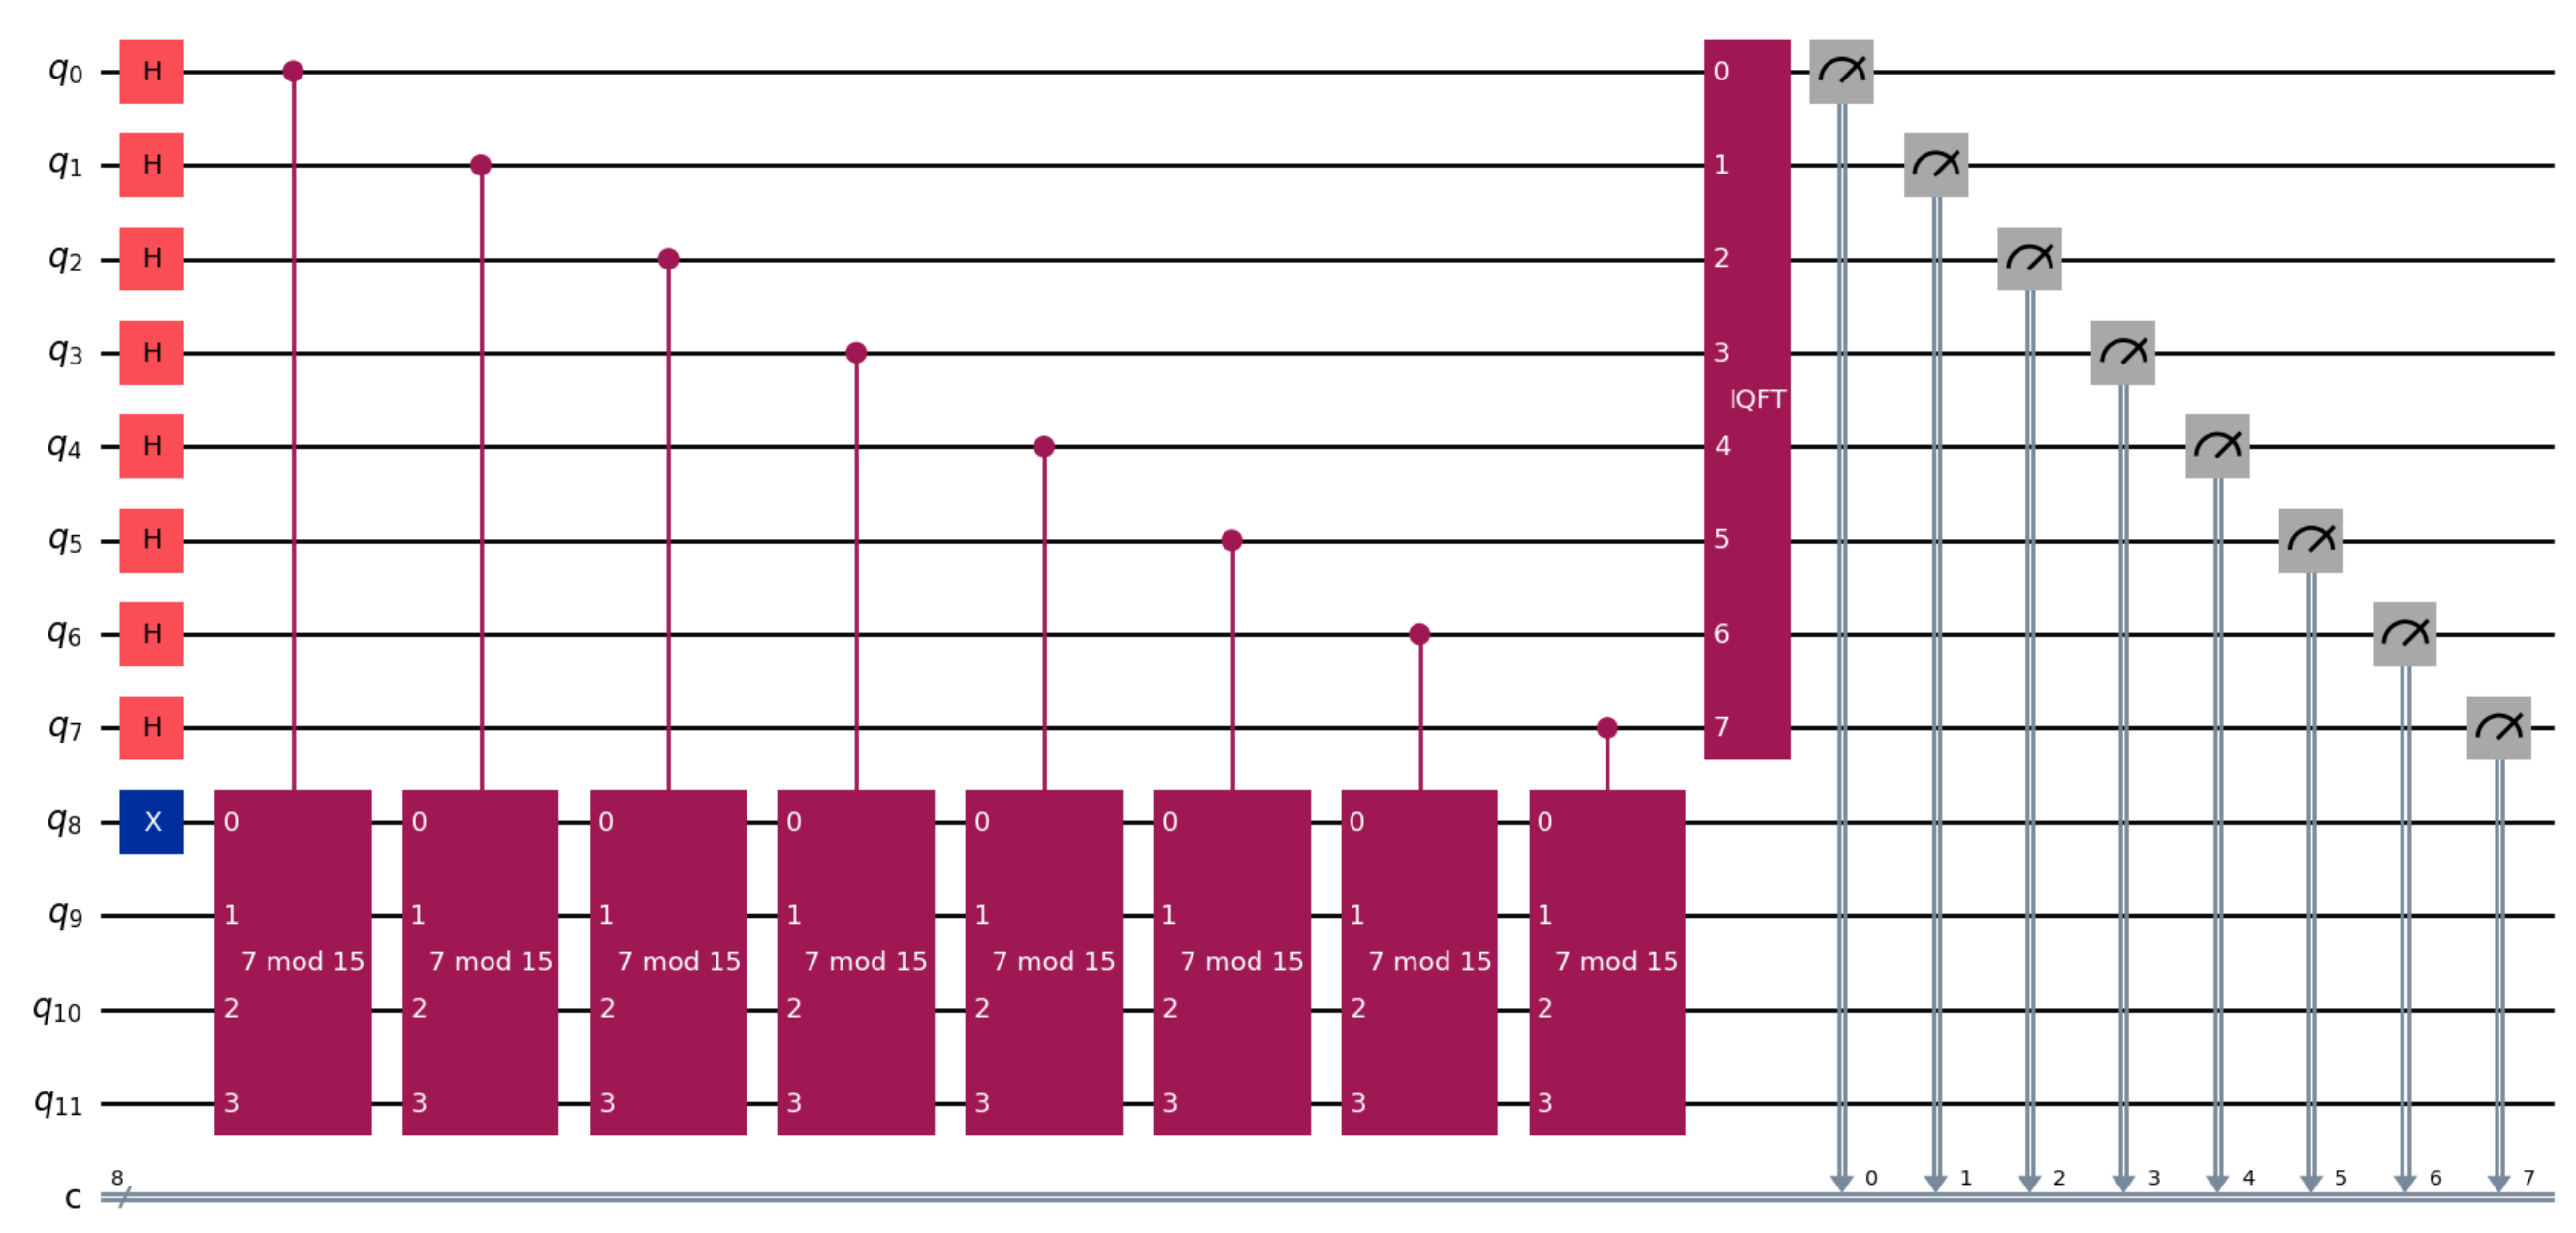

In [ ]:
N_COUNT = 8  # number of counting qubits
a = 7 # Relative prime with 15.

In [ ]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + ?, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.?(q)

# And auxiliary register in state |1>
qc.?(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(?(?),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(?(8, ?=?), range(N_COUNT))

# Measure circuit
qc.measure(range(?), range(?))
qc.draw('mpl', fold=-1)  # -1 means 'do not fold'

# Algorithm of Shor - Finding the Prime Factors

Here's the phase estimation procedure from earlier implemented as a function.

In [ ]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(?, ?, ?)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True,
            )

    qc.compose(
        QFT(precision, ?=?),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, ?)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

We can't easily prepare eigenvectors of the multiplication by 
a ∈ Z15 operation, so we use 
∣1⟩ as suggested.

In [ ]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw('mpl'))

And finally we can run the circuit to try to find a nontrivial factor of 
15.

In [ ]:
# Remind what the controlled_operation is about! 
# Reminf what the psi_prep is about! 
from fractions import Fraction
from math import gcd

a = 8
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    phase = ?(
        ?(?),
        ?,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a ** (r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True

#### Find the prime factors of N

In [ ]:
print("N = ", N)
print("Prime Factor 1 = ", guess)
print("Prime Factor 2 = ",  int(?/?))

# END OF NOTEBOOK